In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Example data
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.1, x.size)


In [ ]:

# Find peaks with a minimum prominence of 0.5
peaks, properties = find_peaks(y, prominence=0.2)

# Plot the data
plt.plot(x, y, label='Data')
plt.plot(x[peaks], y[peaks], 'ro', label='Detected Peaks')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Peak Detection with Prominence')
plt.legend()
plt.show()

In [ ]:

# Find peaks with a minimum threshold of 0.1
peaks, properties = find_peaks(y, threshold=0.1)

# Plot the data
plt.plot(x, y, label='Data')
plt.plot(x[peaks], y[peaks], 'ro', label='Detected Peaks')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Peak Detection with Threshold')
plt.legend()
plt.show()

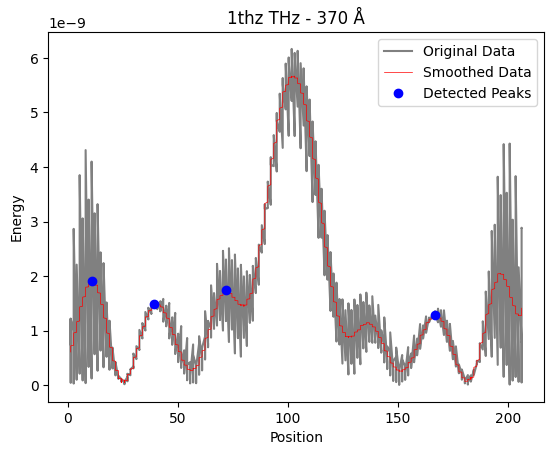

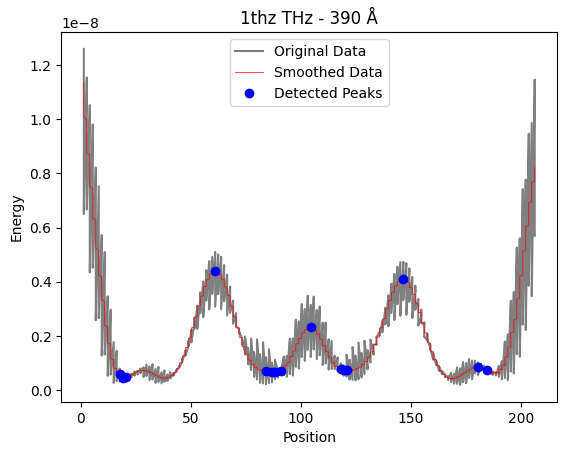

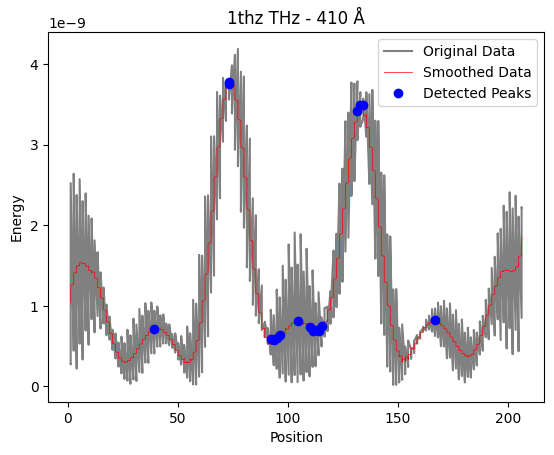

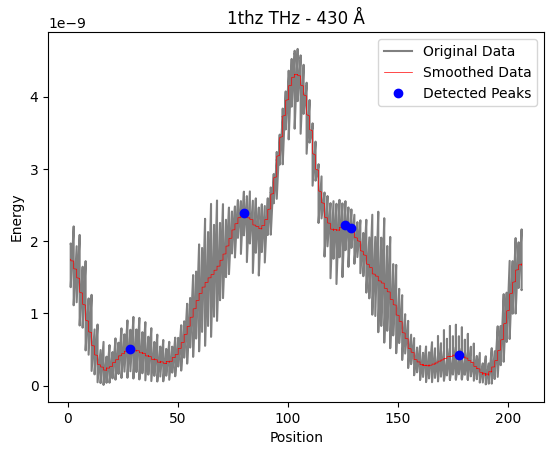

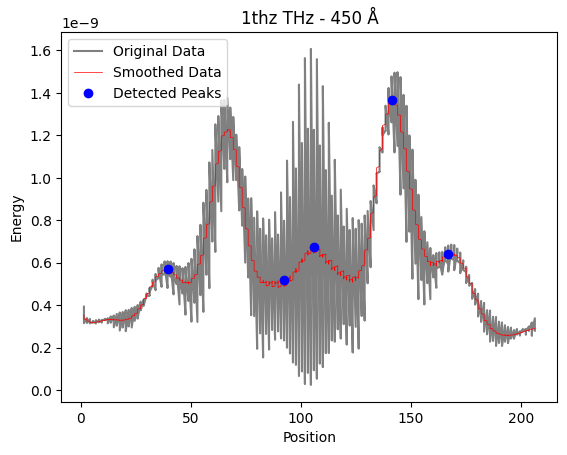

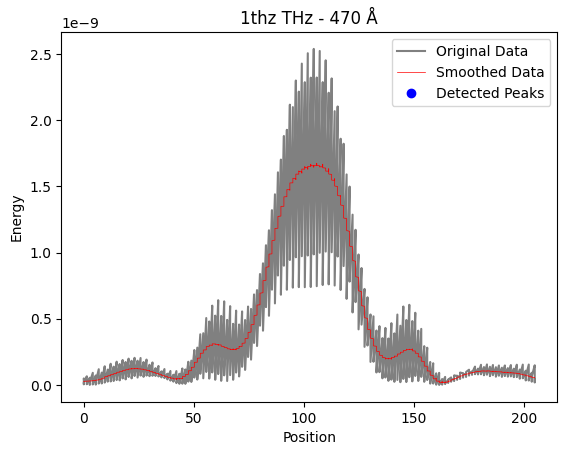

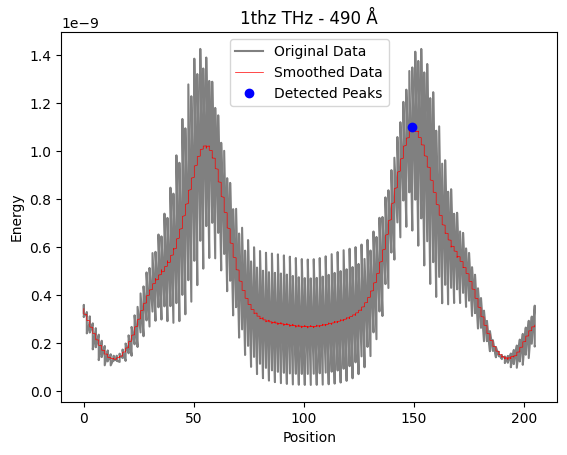

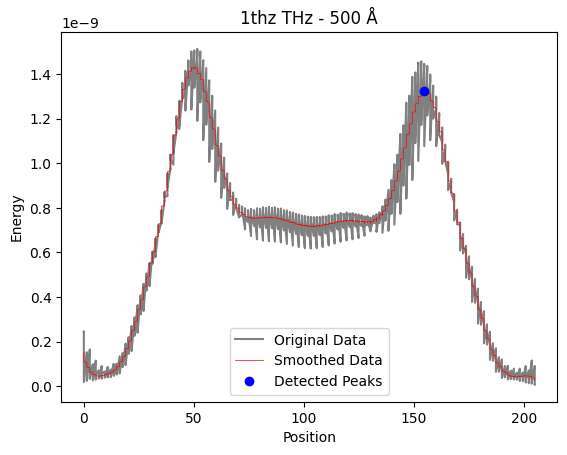

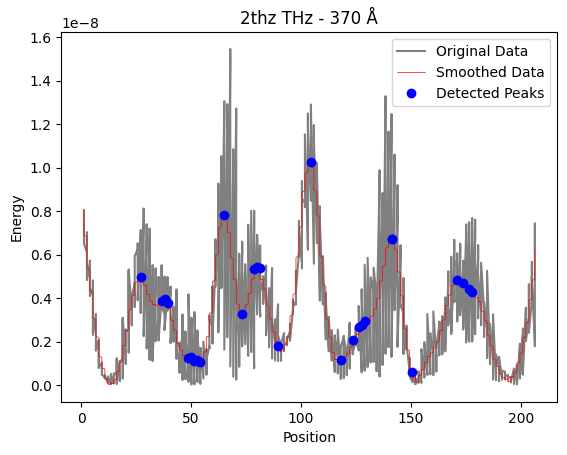

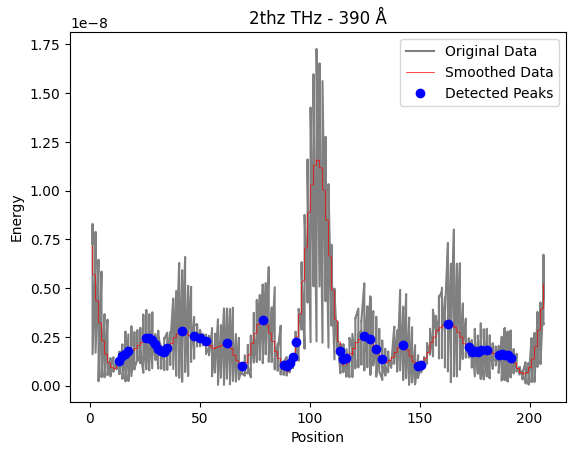

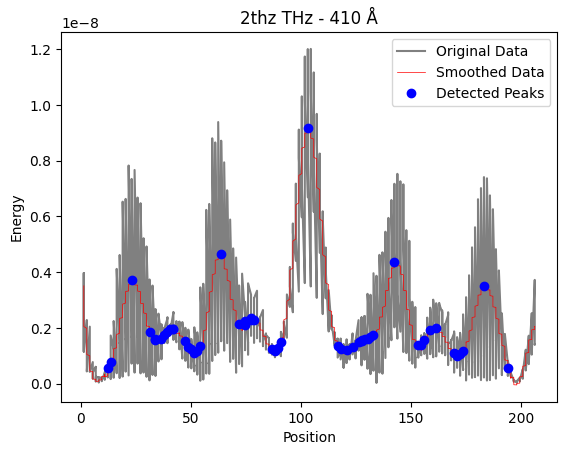

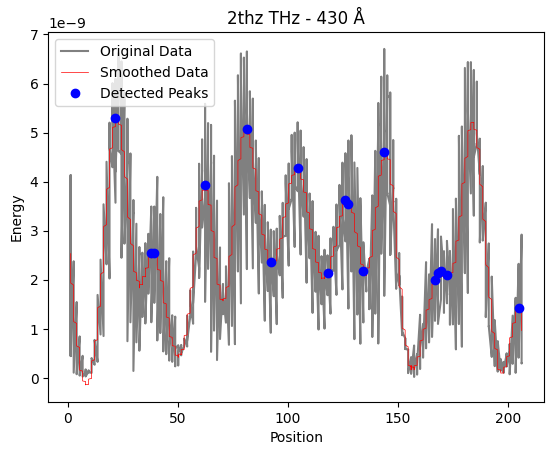

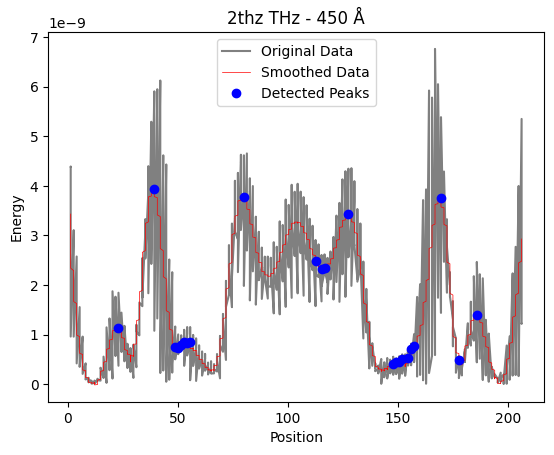

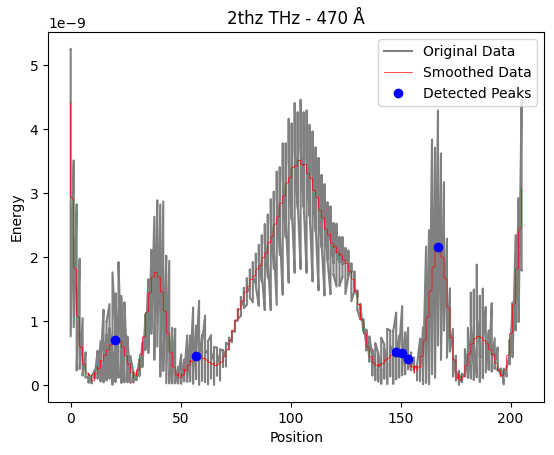

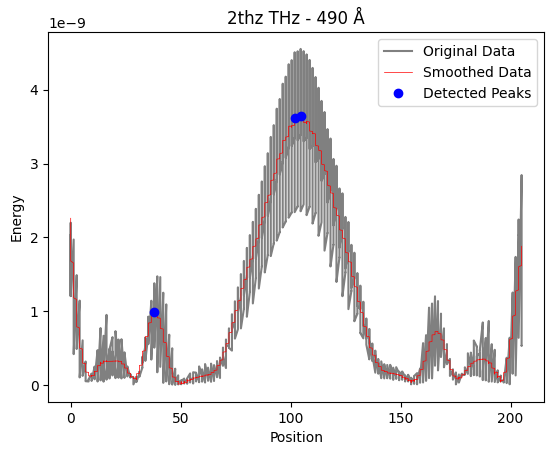

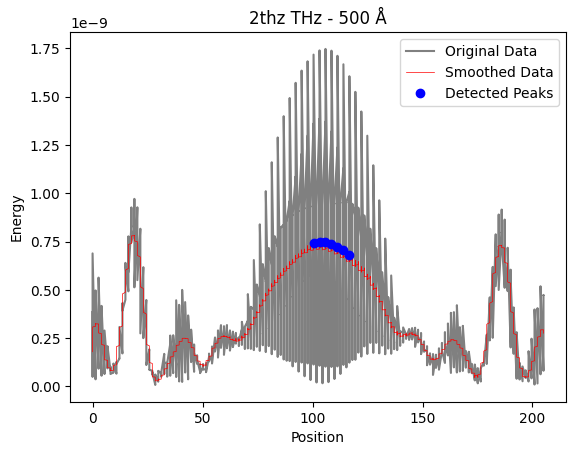

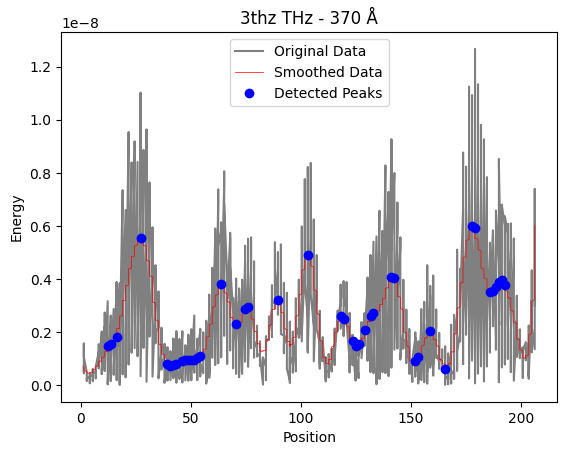

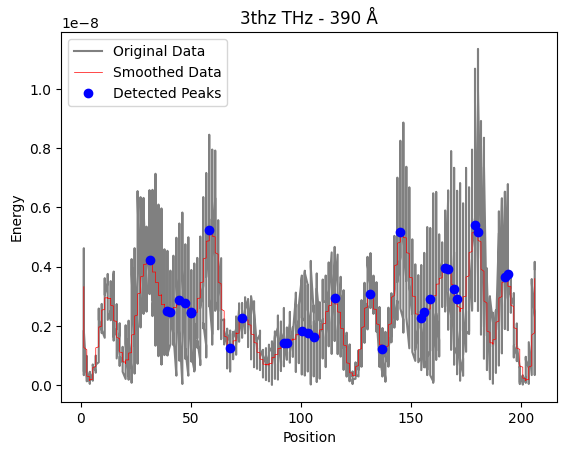

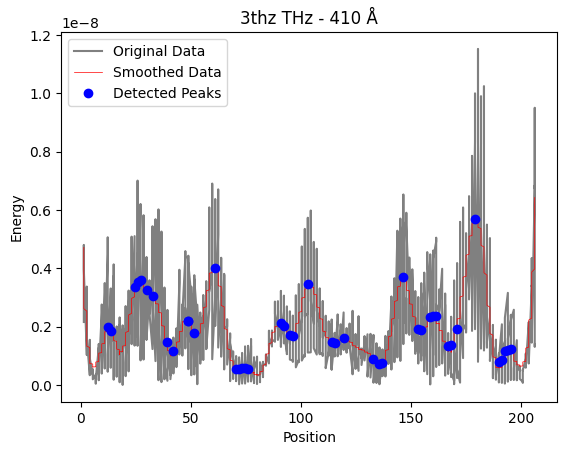

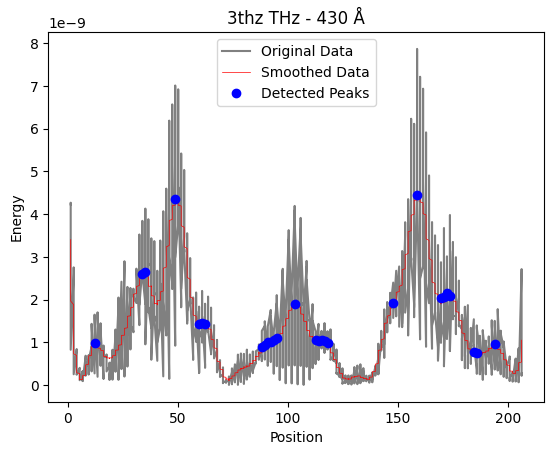

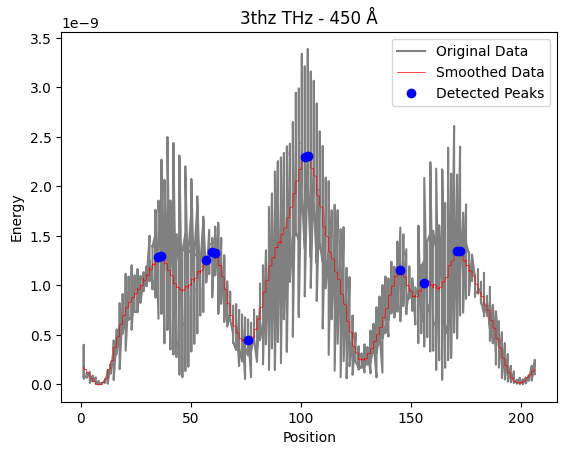

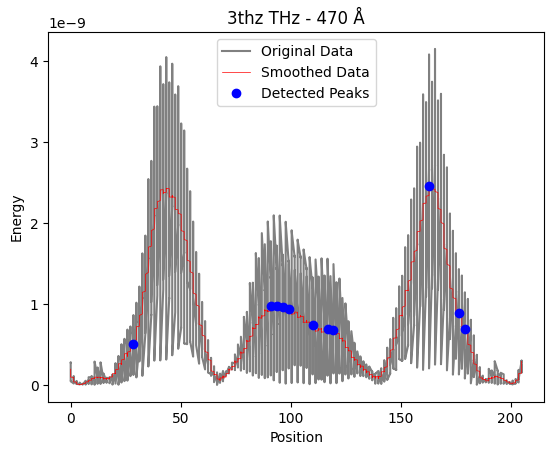

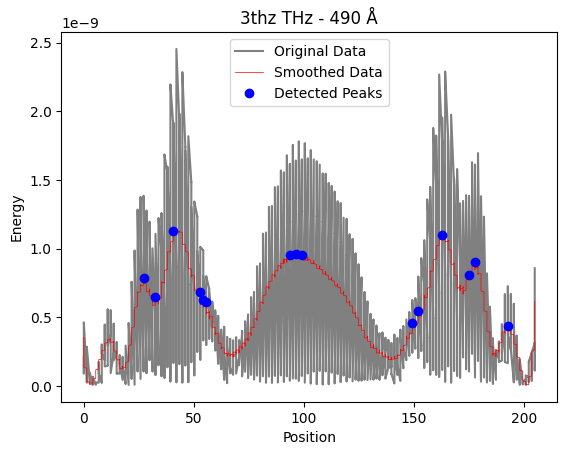

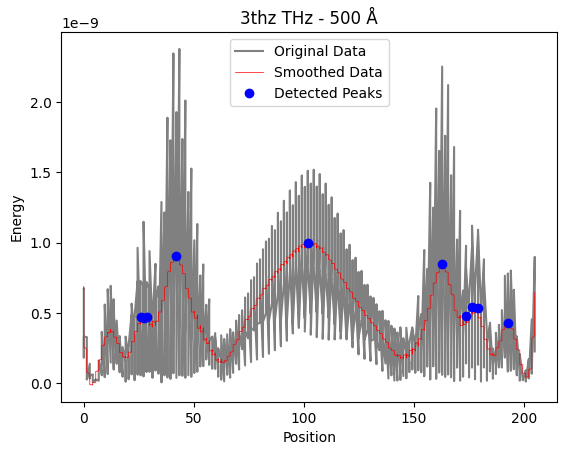

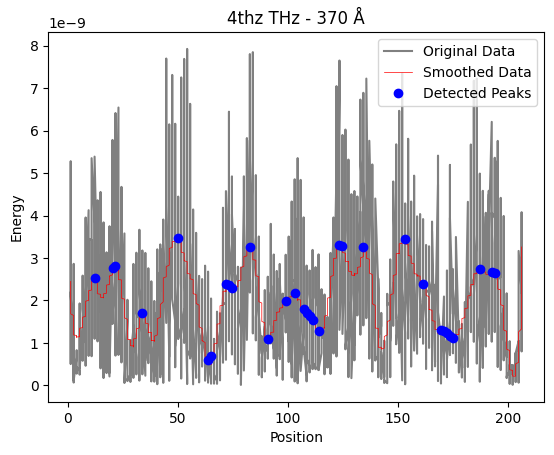

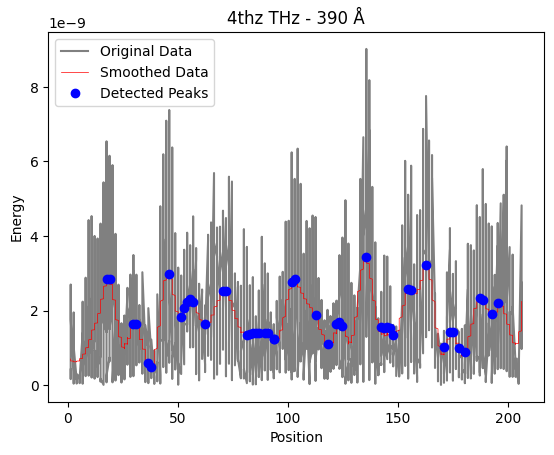

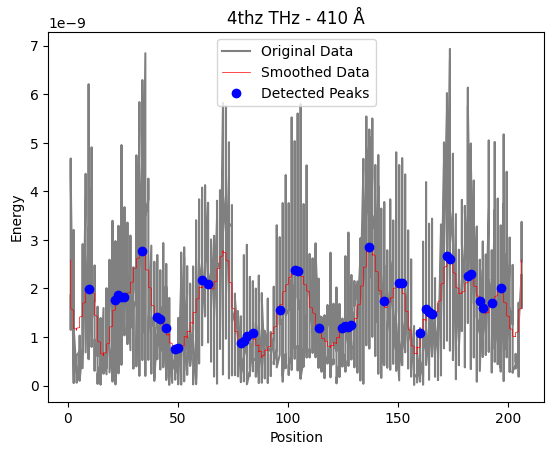

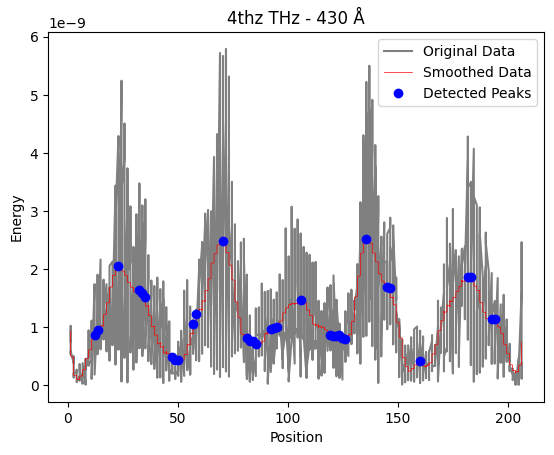

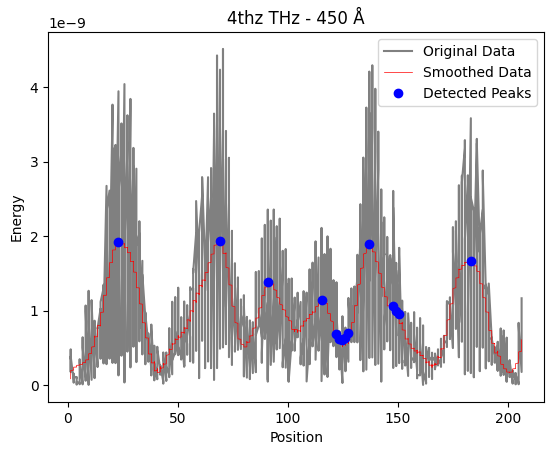

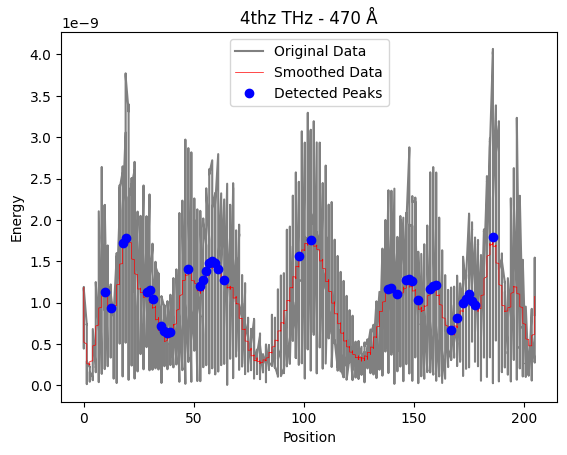

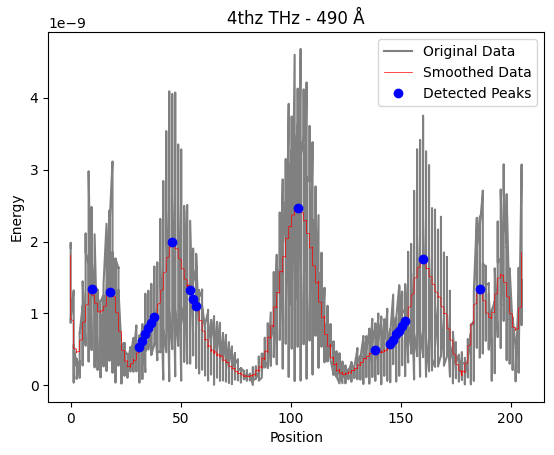

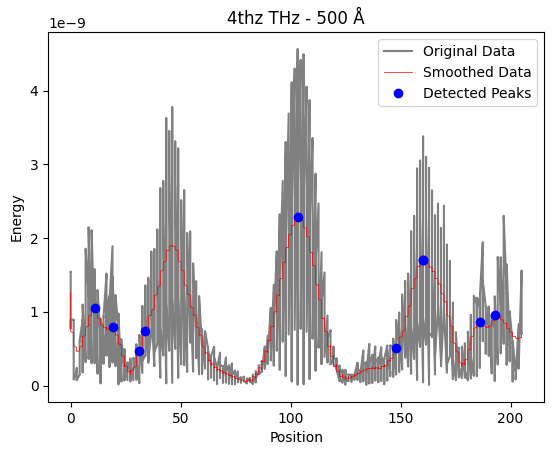

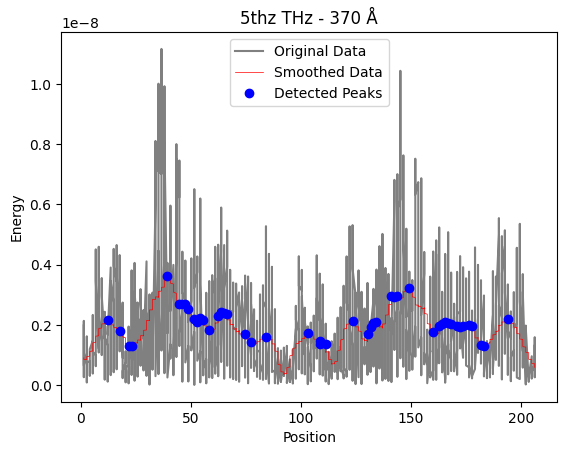

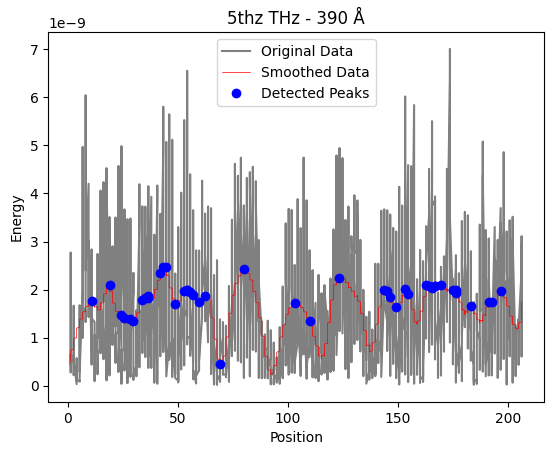

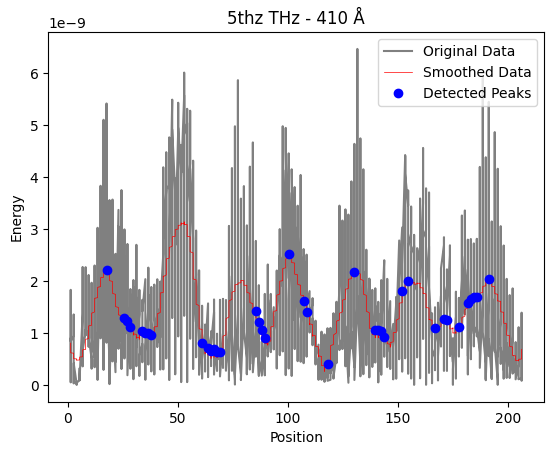

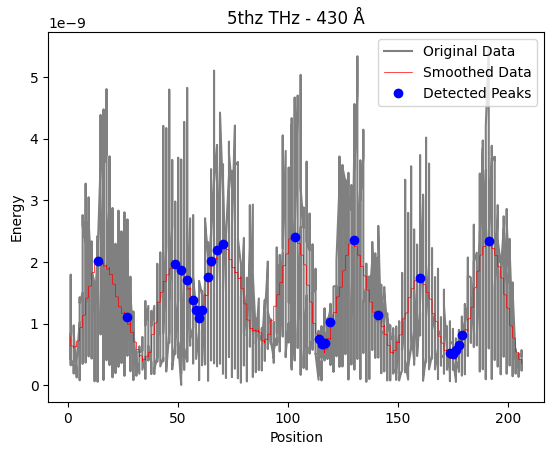

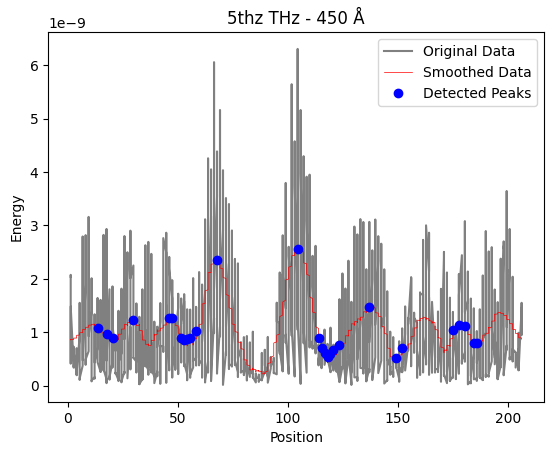

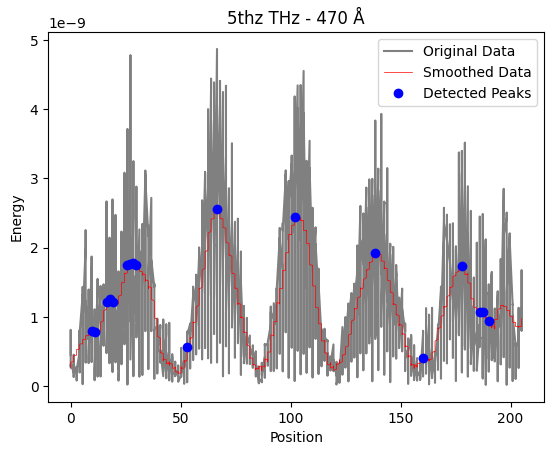

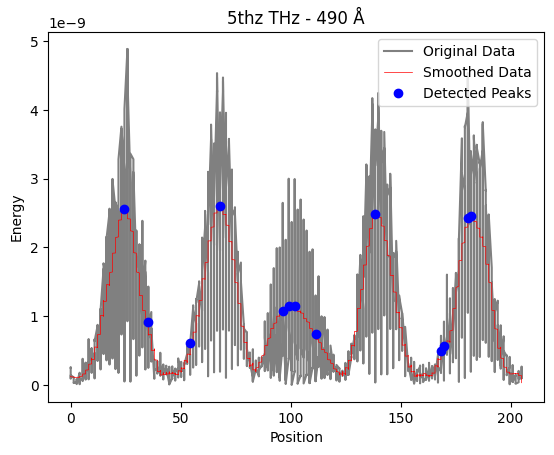

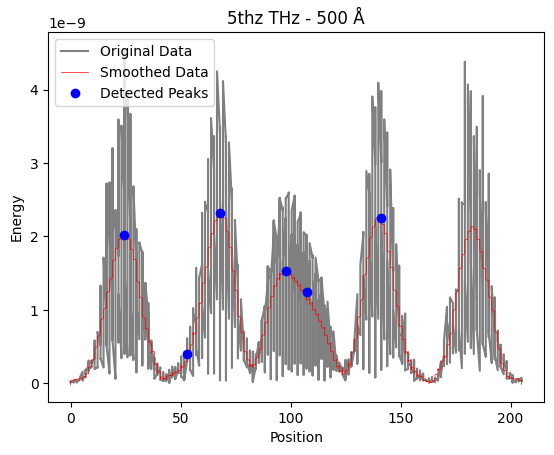

In [43]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, savgol_filter

# Base directory containing subdirectories
base_dir = "/Users/nikidis/Documents/GitHub/phonons/frequency_study"

# Iterate through each subdirectory
for subdir in sorted(os.listdir(base_dir)):
    subdir_path = os.path.join(base_dir, subdir)
    
    # Check if it's a directory
    if os.path.isdir(subdir_path):
        # Extract THz value from directory name
        thz_value = subdir.split('_')[1]
        
        # Iterate through each CSV file in the subdirectory
        for file in sorted(os.listdir(subdir_path)):
            if file.endswith(".csv"):
                file_path = os.path.join(subdir_path, file)
                
                # Read the CSV file
                colnames = ['position', 'energy']
                data = pd.read_csv(file_path, sep=" ", names=colnames, index_col=False)
                
                # Check if DataFrame is empty
                if data.empty:
                    print(f"The DataFrame for {file_path} is empty. Please check the file.")
                    continue
                
                # Sort the DataFrame based on the 'position' column
                data = data.sort_values(by='position')
                
                # Extract data
                x = data['position'].values
                y = data['energy'].values
                
                # Create line plot from scatter plot data
                plt.plot(x, y, label='Original Data', color='gray', alpha=1, linewidth=1.5)
                
                # Apply Savitzky-Golay filter to smooth the data
                window_length = 300  # Window length must be odd and greater than polyorder
                polyorder = 4  # Polynomial order
                y_smooth = savgol_filter(y, window_length, polyorder)
                
                # Plot the smoothed data
                plt.plot(x, y_smooth, label='Smoothed Data', color='red', linewidth=0.5)
                
                # Peak detection parameters
                peak_height = 0.0000000004
                peak_threshold = 0.0000000000001  # No minimum vertical distance requirement
                peak_distance = 1  # Minimum horizontal distance of 1 sample between peaks
                peak_prominence = 0.00000000003  # No prominence requirement
                peak_width = 0  # No width requirement
                
                # Perform peak detection with parameters
                peaks, properties = find_peaks(y_smooth, height=peak_height, threshold=peak_threshold, 
                                               distance=peak_distance, prominence=peak_prominence, width=peak_width)
                
                # Plot the detected peaks
                plt.plot(x[peaks], y_smooth[peaks], 'bo', label='Detected Peaks')
                
                # Add labels and legend
                plt.xlabel('Position')
                plt.ylabel('Energy')
                plt.title(f'{thz_value} THz - {file[:-4]} Å')  # Remove .csv and replace Angstrom with Å
                plt.legend()
                
                # Show the plot for the current file
                plt.show()